In [1]:
import pandas as pd # package for high-performance, easy-to-use data structures and data analysis
import numpy as np # fundamental package for scientific computing with Python
import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
color = sns.color_palette() #컬러팔레트 사용을 위해서 활성화, 적용시 색다른 테마 적용가능
from numpy import array
from matplotlib import cm
from tqdm import tqdm

- 데이터 불러오기 및 열과 행의 갯수 확인

In [2]:
#test와 train 데이터만 불러오기

app_train = pd.read_csv('application_train.csv')
app_test = pd.read_csv('application_test.csv')

In [3]:
#각 데이터에 대한 행과 열의 갯수 확인
#train데이터에 비해 test데이터에 1열이 부족한 이유는 타겟 데이터가 빠졌기 때문

print('Size of application_train data', app_train.shape)
print('Size of application_test data', app_test.shape)

Size of application_train data (307511, 122)
Size of application_test data (48744, 121)


- 범주형 컬럼 데이터를 원핫인코딩 진행 함수(만일을 대비해, target을 제외하고 다른 열이나 행이 있을 경우 삭제시켜줌)

In [4]:
def cat_to_dummy(train, test):
    train_d = pd.get_dummies(train, drop_first=False)
    test_d = pd.get_dummies(test, drop_first=False)
    # make sure that the number of features in train and test should be same
    for i in train_d.columns:
        if i not in test_d.columns:
            if i!='TARGET':
                train_d = train_d.drop(i, axis=1)
    for j in test_d.columns:
        if j not in train_d.columns:
            if j!='TARGET':
                test_d = test_d.drop(i, axis=1)
    print('Memory usage of train increases from {:.2f} to {:.2f} MB'.format(train.memory_usage().sum() / 1024**2, 
                                                                            train_d.memory_usage().sum() / 1024**2))
    print('Memory usage of test increases from {:.2f} to {:.2f} MB'.format(test.memory_usage().sum() / 1024**2, 
                                                                            test_d.memory_usage().sum() / 1024**2))
    return train_d, test_d

In [5]:
#함수 실행

app_train, app_test = cat_to_dummy(app_train, app_test)
print('Size of application_train data', app_train.shape)
print('Size of application_test data', app_test.shape)

Memory usage of train increases from 286.23 to 288.87 MB
Memory usage of test increases from 45.00 to 45.42 MB
Size of application_train data (307511, 243)
Size of application_test data (48744, 242)


- 결측치 확인용 함수 제작 및 사용

In [6]:
def find_missing(data):
    # number of missing values
    count_missing = data.isnull().sum().values
    # total records
    total = data.shape[0]
    # percentage of missing
    ratio_missing = count_missing/total
    # return a dataframe to show: feature name, # of missing and % of missing
    return pd.DataFrame(data={'missing_count':count_missing, 'missing_ratio':ratio_missing}, index=data.columns.values)

In [7]:
#함수 실행

missing_train = find_missing(app_train)
missing_test = find_missing(app_test)

missing = pd.concat([missing_train,missing_test])

-  결측치 단위에 따라 분류해서 보기

In [8]:
#결측치 갯수별로 컬럼 나눠보기
def see_missing(missing):
    missing_10 = missing[  (missing['missing_count']>=10)  &  (missing['missing_count']<20)]  
    missing_100 =  missing[  (missing['missing_count']>=20)  &  (missing['missing_count']<100)] 
    missing_1000 = missing[  (missing['missing_count']>=100)  &  (missing['missing_count']<1000)] 
    missing_10000 = missing[  (missing['missing_count']>=1000)  &  (missing['missing_count']<10000)] 
    missing_100000 = missing[  (missing['missing_count']>=10000)  &  (missing['missing_count']<100000)] 
    missing_1000000 = missing[  (missing['missing_count']>=100000)  ]

    print('결측치 10개 미만\n', missing_10,'\n--------------\n')
    print('결측치 100개 미만\n', missing_100,'\n--------------\n')
    print('결측치 1000개 미만\n', missing_1000,'\n--------------\n')
    print('결측치 10000개 미만\n', missing_10000,'\n--------------\n')
    print('결측치 100000개 미만\n', missing_100000,'\n--------------\n')
    print('결측치 100000개 이상\n', missing_1000000,'\n--------------\n')

In [9]:
see_missing(missing_train)

결측치 10개 미만
              missing_count  missing_ratio
AMT_ANNUITY             12       0.000039 
--------------

결측치 100개 미만
 Empty DataFrame
Columns: [missing_count, missing_ratio]
Index: [] 
--------------

결측치 1000개 미만
                  missing_count  missing_ratio
AMT_GOODS_PRICE            278       0.000904
EXT_SOURCE_2               660       0.002146 
--------------

결측치 10000개 미만
                           missing_count  missing_ratio
OBS_30_CNT_SOCIAL_CIRCLE           1021        0.00332
DEF_30_CNT_SOCIAL_CIRCLE           1021        0.00332
OBS_60_CNT_SOCIAL_CIRCLE           1021        0.00332
DEF_60_CNT_SOCIAL_CIRCLE           1021        0.00332 
--------------

결측치 100000개 미만
                             missing_count  missing_ratio
EXT_SOURCE_3                        60965       0.198253
AMT_REQ_CREDIT_BUREAU_HOUR          41519       0.135016
AMT_REQ_CREDIT_BUREAU_DAY           41519       0.135016
AMT_REQ_CREDIT_BUREAU_WEEK          41519       0.135016
AMT_REQ_CREDIT

In [10]:
see_missing(missing_test)

결측치 10개 미만
 Empty DataFrame
Columns: [missing_count, missing_ratio]
Index: [] 
--------------

결측치 100개 미만
                           missing_count  missing_ratio
AMT_ANNUITY                          24       0.000492
OBS_30_CNT_SOCIAL_CIRCLE             29       0.000595
DEF_30_CNT_SOCIAL_CIRCLE             29       0.000595
OBS_60_CNT_SOCIAL_CIRCLE             29       0.000595
DEF_60_CNT_SOCIAL_CIRCLE             29       0.000595 
--------------

결측치 1000개 미만
 Empty DataFrame
Columns: [missing_count, missing_ratio]
Index: [] 
--------------

결측치 10000개 미만
                             missing_count  missing_ratio
EXT_SOURCE_3                         8668       0.177827
AMT_REQ_CREDIT_BUREAU_HOUR           6049       0.124097
AMT_REQ_CREDIT_BUREAU_DAY            6049       0.124097
AMT_REQ_CREDIT_BUREAU_WEEK           6049       0.124097
AMT_REQ_CREDIT_BUREAU_MON            6049       0.124097
AMT_REQ_CREDIT_BUREAU_QRT            6049       0.124097
AMT_REQ_CREDIT_BUREAU_YEAR        

#### 분석 결과, 상위 결측치 컬럼 리스트를 자세히 보면.
- AMT_REQ_CREDIT_BUREAU~로 되어있는 컬럼의 경우 모두 동일한 열의 갯수만큼 결측치가 발생하고 있음. 참고로, 이 컬럼들은 신청전 1시간/1일/1주일안에 문의 횟수를 보여주고 있음
- ~CNT_SOCIAL_CIRCLE 컬럼들 역시 동일한 특징을 보이고 있음. 참고로, 이 컬럼들은 주변 사회구성원(가족/친구/친적) 숫자를 나타내는 것으로 추정됨
- 결측치가 100000개 이상인 컬럼들은 대부분 집과 관련된 정보를 담고 있음

In [11]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])  # 'DAYS_BIRTH의 값이 음수여서 양으로 바꿔주는 듯 하다.'
app_train['DAYS_EMPLOYED'] = abs(app_train['DAYS_EMPLOYED'])  # 'DAYS_EMPLOYED를 DAYS_BIRTH로 대체하는 걸로 돼있는데 오타인가?'
app_train['DAYS_LAST_PHONE_CHANGE'] = abs(app_train['DAYS_LAST_PHONE_CHANGE'])

- 일부 컬럼을 보면 음수인 경우가 있음. 이 열들의 경우 입사한지, ID등록한지, 태어난지 현재(오늘)로부터 몇 일전인지 보여줌. 만일을 대비해, 히스토그램을 통해 분포를 확인해봤음


,DAYS_BIRTH,DAYS_BIRTH
missing_count,0.0,0.0
missing_ratio,0.0,0.0


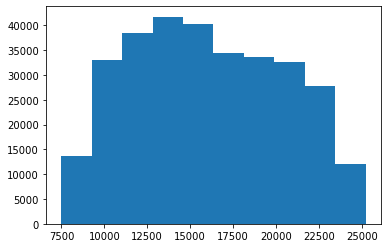

In [12]:
#'DAYS_BIRTH'컬럼, 고객이 언제 태어났는지 유추가능
plt.hist(app_train['DAYS_BIRTH'] )
missing.T['DAYS_BIRTH']

,DAYS_EMPLOYED,DAYS_EMPLOYED
missing_count,0.0,0.0
missing_ratio,0.0,0.0


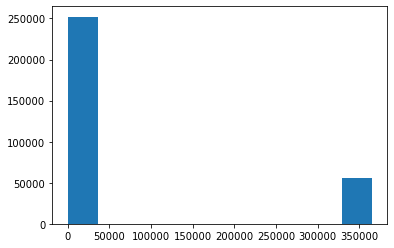

In [13]:
#'DAYS_EMPLOYED'컬럼, 고객이 현재 동일한 직장이 몇 년동안 다녔는지 유추가능
#이상하게 일부 숫자는 양수로 되어 있음(그것도 모두 엑셀에서 같은 숫자를 가짐;;)
plt.hist(app_train['DAYS_EMPLOYED'])
missing.T['DAYS_EMPLOYED']

,DAYS_REGISTRATION,DAYS_REGISTRATION
missing_count,0.0,0.0
missing_ratio,0.0,0.0


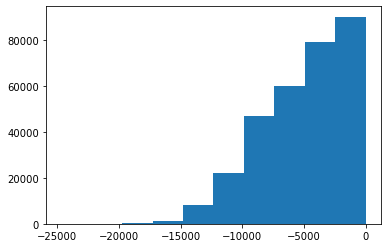

In [14]:
#'DAYS_REGISTRATION'컬럼, 언제 신청서를 수정했는지 유추가능
plt.hist(app_train['DAYS_REGISTRATION'])
missing.T['DAYS_REGISTRATION']

,DAYS_ID_PUBLISH,DAYS_ID_PUBLISH
missing_count,0.0,0.0
missing_ratio,0.0,0.0


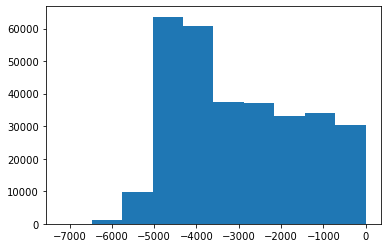

In [15]:
#'DAYS_REGISTRATION'컬럼, 언제 신청서를 수정했는지 유추가능
plt.hist(app_train['DAYS_ID_PUBLISH'])
missing.T['DAYS_ID_PUBLISH']

- 그렇다면, 'DAYS_EMPLOYED'컬럼에 대한 추가적인 작업이 필요한지 여부왁인을 위해 Test 데이터 확인. 

,DAYS_EMPLOYED,DAYS_EMPLOYED
missing_count,0.0,0.0
missing_ratio,0.0,0.0


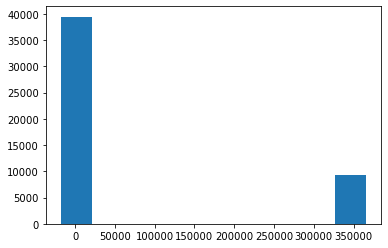

In [16]:
plt.hist(app_test['DAYS_EMPLOYED'])
missing.T['DAYS_EMPLOYED']

- 체크해보니, 동일한 분포를 가지고 있어 작업이 필요없을 것으로 추정되긴 하나, 그래도 혹시 모르니 특이값을 가진 컬럼의 경우 범주형 범수 컬럼을 하나 만들고자 함
- 컬럼 이름은 'DAYS_EMPLOYED_NEW', 특이값에 해당하는 경우에는 0, 나머지는 1로 부여

In [17]:
unnormal_index = list(app_train[app_train['DAYS_EMPLOYED'] > 0].index)
app_train['DAYS_EMPLOYED_NEW'] = 1
DAYS_EMPLOYED_COLUMN = pd.DataFrame(app_train['DAYS_EMPLOYED_NEW'])
DAYS_EMPLOYED_COLUMN.iloc[unnormal_index] = 0
app_train['DAYS_EMPLOYED_NEW'] = DAYS_EMPLOYED_COLUMN
pd.crosstab( app_train.TARGET, app_train.DAYS_EMPLOYED_NEW)

DAYS_EMPLOYED_NEW,0,1
TARGET,,
0,282685,1
1,24824,1


- test set에도 동일하게 적용

In [18]:
unnormal_index = list(app_test[app_test['DAYS_EMPLOYED'] > 0].index)
app_test['DAYS_EMPLOYED_NEW'] = 1
DAYS_EMPLOYED_COLUMN = pd.DataFrame(app_test['DAYS_EMPLOYED_NEW'])
DAYS_EMPLOYED_COLUMN.iloc[unnormal_index] = 0
app_test['DAYS_EMPLOYED_NEW'] = DAYS_EMPLOYED_COLUMN
app_test['DAYS_EMPLOYED_NEW'].head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: DAYS_EMPLOYED_NEW, dtype: int64

- EXT_SOURCE 데이터를 위한 처리 함수 제작 및 적용 (다른 분이 만드셨는데 좀 더 공부해오겠습니당ㅠ)

In [19]:
def feat_ext_source(df):
    x1 = df['EXT_SOURCE_1'].fillna(-1) + 1e-1
    x2 = df['EXT_SOURCE_2'].fillna(-1) + 1e-1
    x3 = df['EXT_SOURCE_3'].fillna(-1) + 1e-1
    
    df['EXT_SOURCE_1over2_NAminus1_Add0.1'] = x1/x2
    df['EXT_SOURCE_2over1_NAminus1_Add0.1'] = x2/x1
    df['EXT_SOURCE_1over3_NAminus1_Add0.1'] = x1/x3
    df['EXT_SOURCE_3over1_NAminus1_Add0.1'] = x3/x1
    df['EXT_SOURCE_2over3_NAminus1_Add0.1'] = x2/x3
    df['EXT_SOURCE_3over2_NAminus1_Add0.1'] = x3/x2
    
    df['EXT_SOURCE_na1_2'] = (df['EXT_SOURCE_1'].isnull()) * (df['EXT_SOURCE_2'].fillna(0))
    df['EXT_SOURCE_na1_3'] = (df['EXT_SOURCE_1'].isnull()) * (df['EXT_SOURCE_3'].fillna(0))
    df['EXT_SOURCE_na2_1'] = (df['EXT_SOURCE_2'].isnull()) * (df['EXT_SOURCE_1'].fillna(0))
    df['EXT_SOURCE_na2_3'] = (df['EXT_SOURCE_2'].isnull()) * (df['EXT_SOURCE_3'].fillna(0))
    df['EXT_SOURCE_na3_1'] = (df['EXT_SOURCE_3'].isnull()) * (df['EXT_SOURCE_1'].fillna(0))
    df['EXT_SOURCE_na3_2'] = (df['EXT_SOURCE_3'].isnull()) * (df['EXT_SOURCE_2'].fillna(0))
    
    df['CREDIT_LENGTH'] = df['AMT_CREDIT'] / df['AMT_ANNUITY']
    
    return df

In [20]:
app_train = feat_ext_source(app_train)
app_test  = feat_ext_source(app_test)
print(app_train.shape, app_test.shape)

(307511, 257) (48744, 256)


#### 현재 번역할 수 있는 수준에서 우리가 적용할 수 있는 것은, 
- 현재의 임금대비 얼마나 대출을 했는지, 연금대출은 얼마인 지 정도와 대출한 금액 대비 연금은 얼마인지, 대출금액 대비 연금 대출은 얼마인지, 태어난 일 수대비 실제로 얼마나 일을 했는지와 같이 단위가 동일한 컬럼들입니다

In [21]:
app_test['CREDIT_INCOME_PERCENT'] = app_test['AMT_CREDIT'] / app_test['AMT_INCOME_TOTAL']
app_test['ANNUITY_INCOME_PERCENT'] = app_test['AMT_ANNUITY'] / app_test['AMT_INCOME_TOTAL']
app_test['CREDIT_TERM'] = app_test['AMT_ANNUITY'] / app_test['AMT_CREDIT']
app_test['DAYS_EMPLOYED_PERCENT'] = app_test['DAYS_EMPLOYED'] / app_test['DAYS_BIRTH']

In [22]:
app_train['CREDIT_INCOME_PERCENT'] = app_train['AMT_CREDIT'] / app_train['AMT_INCOME_TOTAL']
app_train['ANNUITY_INCOME_PERCENT'] = app_train['AMT_ANNUITY'] / app_train['AMT_INCOME_TOTAL']
app_train['CREDIT_TERM'] = app_train['AMT_ANNUITY'] / app_train['AMT_CREDIT']
app_train['DAYS_EMPLOYED_PERCENT'] = app_train['DAYS_EMPLOYED'] / app_train['DAYS_BIRTH']

In [23]:
print(app_train.shape, app_test.shape)

(307511, 261) (48744, 260)


- 위에서 결측치 다룰 때, 결측치가 있다고 해서 모든 컬럼들이 의미 없는 것은 아니기에, 결측치 수가 100개 이하인 컬럼들의 경우 분포를 확인 후 평균으로 대체하고자 합니다.
- AMT_ANNUITY, CREDIT_LENGTH,CREDIT_TERM,ANNUITY_INCOME_PERCENT(ANNUNITY로부터 파생된 컬럼) 등이 이에 해당합니다

In [24]:
def fill_with_mean(train_data,test_data, column_name):
    column_mean = train_data[column_name].mean()
    train_data[column_name]=train_data[column_name].fillna(column_mean)
    test_data[column_name]=test_data[column_name].fillna(column_mean)
    return train_data, test_data

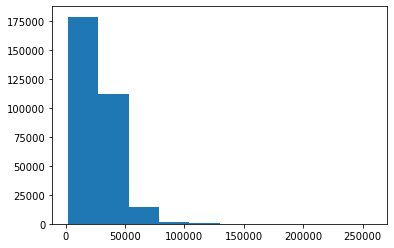

In [25]:
plt.hist(app_train['AMT_ANNUITY'])
app_train, app_test = fill_with_mean(app_train, app_test, 'AMT_ANNUITY')

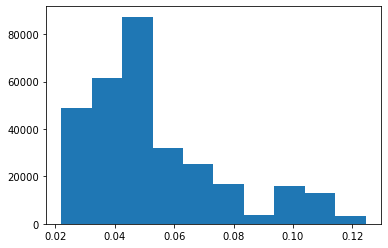

In [26]:
plt.hist(app_train['CREDIT_TERM'])
app_train, app_test = fill_with_mean(app_train, app_test, 'CREDIT_TERM')

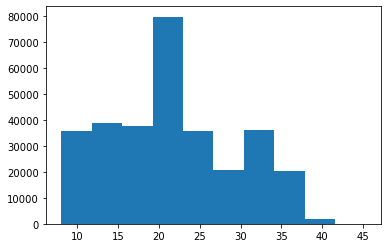

In [27]:
plt.hist(app_train['CREDIT_LENGTH'])
app_train, app_test = fill_with_mean(app_train, app_test, 'CREDIT_LENGTH')

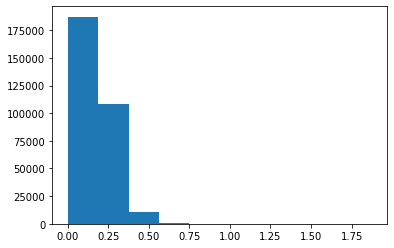

In [28]:
plt.hist(app_train['ANNUITY_INCOME_PERCENT'])
app_train, app_test = fill_with_mean(app_train, app_test, 'ANNUITY_INCOME_PERCENT')

- 추가로 결측치나 빈값이 10개 이하인 경우 평균을 부여합니다

In [29]:
app_train.isnull().sum()[app_train.isnull().sum() > 0]

AMT_GOODS_PRICE                    278
OWN_CAR_AGE                     202929
CNT_FAM_MEMBERS                      2
EXT_SOURCE_1                    173378
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BUILD_MODE                204488
COMMONAREA_MODE                 214865
ELEVATORS_MODE           

In [30]:
app_train, app_test = fill_with_mean(app_train, app_test, 'CNT_FAM_MEMBERS')
app_train, app_test = fill_with_mean(app_train, app_test, 'DAYS_LAST_PHONE_CHANGE')

- 나머지 결측값은 제거하나, 만일을 대비해 이는 app_train2, app_test2로 부여합니다

In [62]:
app_train2 = app_train.drop(app_train.isnull().sum()[app_train.isnull().sum() > 0].index, axis=1)
app_test2 = app_test.drop(app_test.isnull().sum()[app_test.isnull().sum() > 0].index, axis=1)

- 데이터1은 일부 결측치 100개 이하 컬럼들에선 평균을 부여한 후, 나머지 결측치 컬럼은 손데지 않은 app_train, app_test
- 데이터2는 일부 결측치 100개 이하 컬럼들에선 평균을 부여한 후, 나머지 결측히 컬럼은 삭제한 app_train2, app_test2 

In [65]:
app_train2.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       ...
       'EXT_SOURCE_na1_3', 'EXT_SOURCE_na2_1', 'EXT_SOURCE_na2_3',
       'EXT_SOURCE_na3_1', 'EXT_SOURCE_na3_2', 'CREDIT_LENGTH',
       'CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM',
       'DAYS_EMPLOYED_PERCENT'],
      dtype='object', length=203)

## 결정트리(분류)


In [47]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, roc_auc_score
import time
#randomstate에 따라 큰 차이는 없다고 보며 random_state=0으로 설정하고 진행한다
dt_clf=DecisionTreeClassifier(random_state=0)

우선 모델의 정확도를 체크하기 위하여 target값이 주어진 app_train을 train과 test로 나눠서 사용한다

In [33]:
y_df = app_train2['TARGET']
X_df = app_train2.drop(['TARGET'], axis=1)
test_origin = app_test2

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_df,y_df,test_size=0.2,random_state=0)

In [34]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [64]:
params={'max_depth':[1,2,3,5,7,10]}
grid_cv=GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=5)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치:',grid_cv.best_score_)
print('GridSearchCV 최적 하이퍼 파라미터:',grid_cv.best_params_)

GridSearchCV 최고 평균 정확도 수치: 0.9188237780804694
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 1}


In [66]:
params2={'max_depth':[1,2,3,5,7,10],
       'min_samples_split':[5,10,20]}
grid_cv2=GridSearchCV(dt_clf,param_grid=params2,scoring='accuracy',cv=5)
grid_cv2.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치:',grid_cv2.best_score_)
print('GridSearchCV 최적 하이퍼 파라미터:',grid_cv2.best_params_)



GridSearchCV 최고 평균 정확도 수치: 0.9188237780804694
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 1, 'min_samples_split': 5}


In [68]:
params2={'max_depth':[1],
       'min_samples_split':[1,3,5]}
grid_cv2=GridSearchCV(dt_clf,param_grid=params2,scoring='accuracy',cv=5)
grid_cv2.fit(X_train,y_train)
print('GridSearchCV2 최고 평균 정확도 수치:',grid_cv2.best_score_)
print('GridSearchCV2 최적 하이퍼 파라미터:',grid_cv2.best_params_)



GridSearchCV 최고 평균 정확도 수치: 0.9188237780804694
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 1, 'min_samples_split': 3}


In [70]:
#최적 파라미터를 활용한 예측
best_df_clf=grid_cv2.best_estimator_
pred_df=best_df_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred_df)
print('결정트리 예측 정확도:',accuracy)


결정트리 예측 정확도: 0.9210607612636782


## 랜덤포레스트

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
#데이터는 위의 결정트리와 같은 데이터를 이용하여 결과를 비교한다.

#따로 하이퍼 파라미터를 튜닝하지 않고 예측을해본다.
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print('랜덤포레스트 정확도:',accuracy)

랜덤포레스트 정확도: 0.9212883924361414


In [74]:
#랜덤 포레스트 하이퍼 파라미터 및 튜닝
#n_estimators는 default값(10)으로 설정하여 나머지 하이퍼 파라미터를 튜닝한 뒤 n_estimator를 100을 늘려서 정확도를 계산한다

params={
    'max_depth':[1,3,5,10],
    'min_samples_leaf':[1,3,5,10],
    'min_samples_split':[1,3,5,10]
    }
#RandomForest를 설정하고 GridSearchCV수행
rf_clf=RandomForestClassifier(random_state=0,n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params,cv=3,n_jobs=-1)
grid_cv.fit(X_train,y_train)

cv_result=pd.DataFrame(grid_cv.cv_results_)

print('최적 하이퍼 파라미터와 예측 정확도:',grid_cv.best_params_,grid_cv.best_score_)

최적 하이퍼 파라미터와 예측 정확도: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3} 0.9188278430108167


In [75]:
print(X_train.shape)

(246008, 202)


max_depth만을 비교하기 위해서 머신러닝을 해본다

In [76]:
 
params={
    'max_depth':[15,20],
    'min_samples_leaf':[1],
    'min_samples_split':[3]
    }
#RandomForest를 설정하고 GridSearchCV수행
rf_clf=RandomForestClassifier(random_state=0,n_jobs=-1)
grid_cv2 = GridSearchCV(rf_clf, param_grid=params,cv=3,n_jobs=-1)
grid_cv2.fit(X_train,y_train)

cv_result2=pd.DataFrame(grid_cv2.cv_results_)

print('최적 하이퍼 파라미터와 예측 정확도:',grid_cv.best_params_,grid_cv.best_score_)

최적 하이퍼 파라미터와 예측 정확도: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 3} 0.9189213356740303


In [77]:
#max_depth에 따른 정확도 check
#RandomForest를 설정하고 GridSearchCV수행
rf1=RandomForestClassifier(random_state=0,n_jobs=-1)
rf2=RandomForestClassifier(random_state=0,max_depth=10,n_jobs=-1)
rf3=RandomForestClassifier(random_state=0,max_depth=20,n_jobs=-1)

rf1.fit(X_train,y_train)
rf2.fit(X_train,y_train)
rf3.fit(X_train,y_train)

pred1=rf1.predict(X_test)
pred2=rf2.predict(X_test)
pred3=rf3.predict(X_test)


print('rf1정확도:',accuracy_score(y_test,pred1))
print('rf2정확도:',accuracy_score(y_test,pred2))
print('rf3정확도:',accuracy_score(y_test,pred3))

rf1정확도: 0.9212883924361414
rf2정확도: 0.9210607612636782
rf3정확도: 0.9211745768499098


In [93]:
start_time=time.time()
rf4=RandomForestClassifier(random_state=0,max_depth=30,n_jobs=-1)
rf4.fit(X_train,y_train)
pred4=rf4.predict(X_test)
print('rf4정확도:',accuracy_score(y_test,pred4))
print('수행시간:{0:.1f}초'.format(time.time()-start_time))

rf4정확도: 0.9212396143277564
수행시간:111.9초


In [46]:
start_time=time.time()
rf5=RandomForestClassifier(random_state=0,max_depth=40,n_jobs=-1)
rf5.fit(X_train,y_train)
pred5=rf5.predict(X_test)
print('rf5정확도:',accuracy_score(y_test,pred5))
print('수행시간:{0:.1f}초'.format(time.time()-start_time))

rf5정확도: 0.9214022080223729
수행시간:92.1초


GBM - 가중치 업데이트를 경사하강법을 이용


In [81]:
import time
from sklearn.ensemble import GradientBoostingClassifier
start_time = time.time()

GB=GradientBoostingClassifier(random_state=0)
GB.fit(X_train,y_train)
GB_pred=GB.predict(X_test)
GB_accuracy=accuracy_score(y_test,GB_pred)

print('정확도:',GB_accuracy)
print('수행시간:{0:.1f}초'.format(time.time()-start_time))

정확도: 0.9213859486529112
수행시간:437.6초


In [82]:
## 시간되면 GBM하이퍼 파라미처 튜닝해보기

In [83]:
#XGboost 는 병렬학습이 가능함& GBM기반 빠르게 학습가능 & 내정된 교차검증이 있다 & 결손값 자체처리 가능


In [84]:
import xgboost as xgb
from xgboost import XGBClassifier

In [89]:
start_time = time.time()
xgb_wrapper = XGBClassifier(random_state=1, n_estimators=400, learning_rate=0.5, max_depth=3)
evals=[(X_test,y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss",eval_set=evals,verbose=True)
xgb_wrapper_pred = xgb_wrapper.predict(X_test)
xgb_accuracy = accuracy_score(xgb_wrapper_pred,y_test )

print(xgb_accuracy)
print('수행시간:{0:.1f}초'.format(time.time()-start_time))

[0]	validation_0-logloss:0.42255
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.32912
[2]	validation_0-logloss:0.28979
[3]	validation_0-logloss:0.27218
[4]	validation_0-logloss:0.26416
[5]	validation_0-logloss:0.25990
[6]	validation_0-logloss:0.25751
[7]	validation_0-logloss:0.25588
[8]	validation_0-logloss:0.25424
[9]	validation_0-logloss:0.25311
[10]	validation_0-logloss:0.25228
[11]	validation_0-logloss:0.25184
[12]	validation_0-logloss:0.25138
[13]	validation_0-logloss:0.25101
[14]	validation_0-logloss:0.25079
[15]	validation_0-logloss:0.25025
[16]	validation_0-logloss:0.24991
[17]	validation_0-logloss:0.24964
[18]	validation_0-logloss:0.24934
[19]	validation_0-logloss:0.24891
[20]	validation_0-logloss:0.24868
[21]	validation_0-logloss:0.24873
[22]	validation_0-logloss:0.24850
[23]	validation_0-logloss:0.24839
[24]	validation_0-logloss:0.24840
[25]	validation_0-logloss:0.24829
[26]	validation_0-logloss:0.24790
[27]	validation_0-loglo

In [90]:
start_time = time.time()
xgb_wrapper = XGBClassifier(random_state=1, n_estimators=400, learning_rate=0.1, max_depth=3)
evals=[(X_test,y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss",eval_set=evals,verbose=True)
xgb_wrapper_pred = xgb_wrapper.predict(X_test)
xgb_accuracy = accuracy_score(xgb_wrapper_pred,y_test )

print(xgb_accuracy)
print('수행시간:{0:.1f}초'.format(time.time()-start_time))

[0]	validation_0-logloss:0.62532
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.56979
[2]	validation_0-logloss:0.52384
[3]	validation_0-logloss:0.48533
[4]	validation_0-logloss:0.45298
[5]	validation_0-logloss:0.42544
[6]	validation_0-logloss:0.40202
[7]	validation_0-logloss:0.38200
[8]	validation_0-logloss:0.36481
[9]	validation_0-logloss:0.35010
[10]	validation_0-logloss:0.33745
[11]	validation_0-logloss:0.32652
[12]	validation_0-logloss:0.31713
[13]	validation_0-logloss:0.30902
[14]	validation_0-logloss:0.30207
[15]	validation_0-logloss:0.29601
[16]	validation_0-logloss:0.29081
[17]	validation_0-logloss:0.28633
[18]	validation_0-logloss:0.28245
[19]	validation_0-logloss:0.27905
[20]	validation_0-logloss:0.27614
[21]	validation_0-logloss:0.27359
[22]	validation_0-logloss:0.27137
[23]	validation_0-logloss:0.26948
[24]	validation_0-logloss:0.26779
[25]	validation_0-logloss:0.26629
[26]	validation_0-logloss:0.26504
[27]	validation_0-loglo

[236]	validation_0-logloss:0.24547
[237]	validation_0-logloss:0.24547
[238]	validation_0-logloss:0.24547
[239]	validation_0-logloss:0.24546
[240]	validation_0-logloss:0.24544
[241]	validation_0-logloss:0.24544
[242]	validation_0-logloss:0.24544
[243]	validation_0-logloss:0.24544
[244]	validation_0-logloss:0.24543
[245]	validation_0-logloss:0.24540
[246]	validation_0-logloss:0.24539
[247]	validation_0-logloss:0.24539
[248]	validation_0-logloss:0.24539
[249]	validation_0-logloss:0.24538
[250]	validation_0-logloss:0.24537
[251]	validation_0-logloss:0.24536
[252]	validation_0-logloss:0.24535
[253]	validation_0-logloss:0.24534
[254]	validation_0-logloss:0.24534
[255]	validation_0-logloss:0.24534
[256]	validation_0-logloss:0.24534
[257]	validation_0-logloss:0.24531
[258]	validation_0-logloss:0.24530
[259]	validation_0-logloss:0.24522
[260]	validation_0-logloss:0.24522
[261]	validation_0-logloss:0.24519
[262]	validation_0-logloss:0.24517
[263]	validation_0-logloss:0.24516
[264]	validation_0-l

XGboost조차도 오래 걸린다. 특히 GridSearchCV를 하면
훨씬 빠른 LightGBM사용
LightGBM은 적은 데이터 세트에 적용할 경우 과적합이 발생하기 쉽다. (<=10000.LightBGM공식문서)
비대칭 형태의 Tree형태 사용 -> 예측 오류 손실을 최소화 할 수 있다
카테고리형 피처의 자동 변환과 최적분할(원-핫 인코딩 등을 사용하지 않고도 카테고리형 피처를 최적으로 변환하고 이에 따른 노드 분할 수행)




num_leaves의 개수를 중심으로 나머지 하이퍼 파라미터(min_child_samples,max_depth등)를 함께 조정하면서 모델의 복잡도를 줄이는 것이 기본 튜닝 방법

LGBM도 XGBoost와 동일하게 조기 중단 수행 가능.

In [39]:
#feature 데이터에 존재하는 json값으로 lightbgm이 작동하지 않아서 데이터를 다시 설정해주었다
import re
X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [51]:
from lightgbm import LGBMClassifier

start_time=time.time()

lgbm_wrapper=LGBMClassifier(random_state=0,n_estimators=400)

evals=[(X_test,y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss",eval_set=evals,verbose=True)
lgbm_wrapper_preds=lgbm_wrapper.predict(X_test)
lgbm_accuracy = accuracy_score(lgbm_wrapper_preds,y_test )
roc_auc_lgbm=roc_auc_score(y_test,lgbm_wrapper_preds)


print('roc_auc_score:',roc_auc_lgbm)
print('정확도:',lgbm_accuracy)
print('수행시간:{0:.1f}초'.format(time.time()-start_time))

[1]	valid_0's binary_logloss: 0.272191
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.269098
[3]	valid_0's binary_logloss: 0.26665
[4]	valid_0's binary_logloss: 0.264638
[5]	valid_0's binary_logloss: 0.262789
[6]	valid_0's binary_logloss: 0.261283
[7]	valid_0's binary_logloss: 0.260034
[8]	valid_0's binary_logloss: 0.258819
[9]	valid_0's binary_logloss: 0.257693
[10]	valid_0's binary_logloss: 0.256733
[11]	valid_0's binary_logloss: 0.256006
[12]	valid_0's binary_logloss: 0.255224
[13]	valid_0's binary_logloss: 0.254613
[14]	valid_0's binary_logloss: 0.254038
[15]	valid_0's binary_logloss: 0.253417
[16]	valid_0's binary_logloss: 0.253038
[17]	valid_0's binary_logloss: 0.25254
[18]	valid_0's binary_logloss: 0.251773
[19]	valid_0's binary_logloss: 0.251371
[20]	valid_0's binary_logloss: 0.251074
[21]	valid_0's binary_logloss: 0.250799
[22]	valid_0's binary_logloss: 0.250502
[23]	valid_0's binary_logloss: 0.250269
[24]	valid_0's binary_logloss

[204]	valid_0's binary_logloss: 0.245218
[205]	valid_0's binary_logloss: 0.245223
[206]	valid_0's binary_logloss: 0.245203
[207]	valid_0's binary_logloss: 0.245215
[208]	valid_0's binary_logloss: 0.24522
[209]	valid_0's binary_logloss: 0.245238
[210]	valid_0's binary_logloss: 0.245221
[211]	valid_0's binary_logloss: 0.24524
[212]	valid_0's binary_logloss: 0.245222
[213]	valid_0's binary_logloss: 0.245226
[214]	valid_0's binary_logloss: 0.245233
[215]	valid_0's binary_logloss: 0.245247
[216]	valid_0's binary_logloss: 0.245233
Early stopping, best iteration is:
[116]	valid_0's binary_logloss: 0.245133
roc_auc_score: 0.5065529413142115
정확도: 0.9213371705445262
수행시간:20.2초


XGBoost와 LightBGM의 속도 비교를 위해 처음 행했던 XGBoost와 모든 하이퍼 파라미터를 동일하게 설정하여 LightBGM을 수행해본다.

In [44]:
start_time=time.time()

lgbm_wrapper_time=LGBMClassifier(random_state=1, n_estimators=400, learning_rate=0.5, max_depth=3)

evals=[(X_test,y_test)]
lgbm_wrapper_time.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss",eval_set=evals,verbose=True)
lgbm_wrapper_time_preds=lgbm_wrapper_time.predict(X_test)
lgbm_time_accuracy = accuracy_score(lgbm_wrapper_time_preds,y_test )

print(lgbm_time_accuracy)
print('수행시간:{0:.1f}초'.format(time.time()-start_time))

[1]	valid_0's binary_logloss: 0.266972
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.263113
[3]	valid_0's binary_logloss: 0.26082
[4]	valid_0's binary_logloss: 0.258028
[5]	valid_0's binary_logloss: 0.256543
[6]	valid_0's binary_logloss: 0.255338
[7]	valid_0's binary_logloss: 0.254516
[8]	valid_0's binary_logloss: 0.253556
[9]	valid_0's binary_logloss: 0.252993
[10]	valid_0's binary_logloss: 0.252665
[11]	valid_0's binary_logloss: 0.252263
[12]	valid_0's binary_logloss: 0.251971
[13]	valid_0's binary_logloss: 0.251649
[14]	valid_0's binary_logloss: 0.251405
[15]	valid_0's binary_logloss: 0.251109
[16]	valid_0's binary_logloss: 0.250605
[17]	valid_0's binary_logloss: 0.250472
[18]	valid_0's binary_logloss: 0.250303
[19]	valid_0's binary_logloss: 0.249742
[20]	valid_0's binary_logloss: 0.249756
[21]	valid_0's binary_logloss: 0.249752
[22]	valid_0's binary_logloss: 0.249633
[23]	valid_0's binary_logloss: 0.249337
[24]	valid_0's binary_loglos

[204]	valid_0's binary_logloss: 0.247296
[205]	valid_0's binary_logloss: 0.247306
Early stopping, best iteration is:
[105]	valid_0's binary_logloss: 0.246465
0.9201990146822107
수행시간:12.2초


XGBoost:226초, 정확도: 920768...

LightBGM:12.2초, 정확도:0.920199...

약 20배의 시간차이에 비해 정확도의 차이는 크게 나지 않음을 알 수 있다.

# 로지스틱회귀

In [49]:
from sklearn.linear_model import LogisticRegression

lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_preds=lr_clf.predict(X_test)
accuracy_lr=accuracy_score(y_test,lr_preds)
roc_auc_lr=roc_auc_score(y_test,lr_preds)


print('roc_auc_score:',roc_auc_lr)
print('accuracy:',accuracy_lr)


roc_auc_score: 0.5
accuracy: 0.9210607612636782


실제 train을 이용하여 test값을 예측 
(결측값을 제외한 데이터를 사용)

In [59]:
y_df = app_train2['TARGET']
X_df = app_train2.drop(['TARGET'], axis=1)
#feature 데이터에 존재하는 json값으로 lightbgm이 작동하지 않아서 데이터를 다시 설정해주었다
import re
X_df = X_df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
app_test2 = app_test2.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
print(X_df.shape)
print(app_test2.shape)

(307511, 202)
(48744, 203)


In [68]:
y_org = app_train['TARGET']
X_org = app_train.drop(['TARGET'], axis=1)



In [69]:
y_org = app_train['TARGET']
X_org = app_train.drop(['TARGET'], axis=1)

import xgboost as xgb
from xgboost import XGBClassifier

start_time = time.time()
xgb_wrapper = XGBClassifier(random_state=1, n_estimators=400, learning_rate=0.1, max_depth=3)
evals=[(X_org,y_org)]
xgb_wrapper.fit(X_org, y_org, early_stopping_rounds=100, eval_metric="logloss",eval_set=evals,verbose=True)
xgb_wrapper_pred = xgb_wrapper.predict(app_test)

print('수행시간:{0:.1f}초'.format(time.time()-start_time))

[0]	validation_0-logloss:0.62507
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.56937
[2]	validation_0-logloss:0.52341
[3]	validation_0-logloss:0.48490
[4]	validation_0-logloss:0.45232
[5]	validation_0-logloss:0.42489
[6]	validation_0-logloss:0.40128
[7]	validation_0-logloss:0.38123
[8]	validation_0-logloss:0.36392
[9]	validation_0-logloss:0.34916
[10]	validation_0-logloss:0.33640
[11]	validation_0-logloss:0.32543
[12]	validation_0-logloss:0.31593
[13]	validation_0-logloss:0.30771
[14]	validation_0-logloss:0.30063
[15]	validation_0-logloss:0.29453
[16]	validation_0-logloss:0.28922
[17]	validation_0-logloss:0.28462
[18]	validation_0-logloss:0.28068
[19]	validation_0-logloss:0.27725
[20]	validation_0-logloss:0.27427
[21]	validation_0-logloss:0.27166
[22]	validation_0-logloss:0.26944
[23]	validation_0-logloss:0.26747
[24]	validation_0-logloss:0.26575
[25]	validation_0-logloss:0.26423
[26]	validation_0-logloss:0.26290
[27]	validation_0-loglo

[236]	validation_0-logloss:0.24021
[237]	validation_0-logloss:0.24019
[238]	validation_0-logloss:0.24017
[239]	validation_0-logloss:0.24016
[240]	validation_0-logloss:0.24013
[241]	validation_0-logloss:0.24010
[242]	validation_0-logloss:0.24008
[243]	validation_0-logloss:0.24006
[244]	validation_0-logloss:0.24004
[245]	validation_0-logloss:0.24002
[246]	validation_0-logloss:0.24000
[247]	validation_0-logloss:0.23997
[248]	validation_0-logloss:0.23996
[249]	validation_0-logloss:0.23995
[250]	validation_0-logloss:0.23993
[251]	validation_0-logloss:0.23991
[252]	validation_0-logloss:0.23988
[253]	validation_0-logloss:0.23987
[254]	validation_0-logloss:0.23986
[255]	validation_0-logloss:0.23985
[256]	validation_0-logloss:0.23979
[257]	validation_0-logloss:0.23977
[258]	validation_0-logloss:0.23975
[259]	validation_0-logloss:0.23972
[260]	validation_0-logloss:0.23971
[261]	validation_0-logloss:0.23970
[262]	validation_0-logloss:0.23968
[263]	validation_0-logloss:0.23966
[264]	validation_0-l

In [70]:
xgb_wrapper_pred.shape

(48744,)

In [74]:
ID=pd.DataFrame(app_test['SK_ID_CURR'])
T_pred=pd.DataFrame(xgb_wrapper_pred)


In [77]:
ID['pred']=T_pred

In [78]:
ID

,SK_ID_CURR,pred
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0
...,...,...
48739,456221,0
48740,456222,0
48741,456223,0
48742,456224,0


In [86]:
ID.to_csv(r"C:\Users\stat\ML\Home Credit Data Analysis2\pred.csv")